<a href="https://colab.research.google.com/github/DeepakRapeti/SmartInterz/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_claim=pd.read_csv('/content/insurance_claims.csv')
df=pd.read_csv('/content/insurance_data_set.csv')

In [3]:
df_claim.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df_claim.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
df_claim.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

The data contains 1000 inputs to 39 variables all of which have zero missing values. Column 40 is empty.

In [7]:
df_claim._c39

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
995   NaN
996   NaN
997   NaN
998   NaN
999   NaN
Name: _c39, Length: 1000, dtype: float64

Drop _c39 as it is a null column

In [8]:
df_claim.drop('_c39',axis=1,inplace=True)

In [9]:
df_claim['policy_bind_date']

0      2014-10-17
1      2006-06-27
2      2000-09-06
3      1990-05-25
4      2014-06-06
          ...    
995    1991-07-16
996    2014-01-05
997    2003-02-17
998    2011-11-18
999    1996-11-11
Name: policy_bind_date, Length: 1000, dtype: object

In [10]:
df_claim['incident_date']

0      2015-01-25
1      2015-01-21
2      2015-02-22
3      2015-01-10
4      2015-02-17
          ...    
995    2015-02-22
996    2015-01-24
997    2015-01-23
998    2015-02-26
999    2015-02-26
Name: incident_date, Length: 1000, dtype: object

In [11]:
df_claim['policy_bind_date']=pd.to_datetime(df_claim['policy_bind_date'])
df_claim['policy_bind_year'] = df_claim.policy_bind_date.dt.year
df_claim['policy_bind_month'] = df_claim.policy_bind_date.dt.month
df_claim['policy_bind_day'] = df_claim.policy_bind_date.dt.day
df_claim['policy_bind_week_of_year'] = df_claim.policy_bind_date.dt.isocalendar().week
df_claim['incident_date'] = pd.to_datetime(df_claim['incident_date'])
df_claim['incident_year'] = df_claim.incident_date.dt.year
df_claim['incident_month'] = df_claim.incident_date.dt.month
df_claim['incident_day'] = df_claim.incident_date.dt.day
df_claim['incident_week_of_year'] = df_claim.incident_date.dt.isocalendar().week

In [12]:
df_claim.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,policy_bind_week_of_year,incident_year,incident_month,incident_day,incident_week_of_year
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2004,Y,2014,10,17,42,2015,1,25,4
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,2007,Y,2006,6,27,26,2015,1,21,4
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,2007,N,2000,9,6,36,2015,2,22,8
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2014,Y,1990,5,25,21,2015,1,10,2
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,2009,N,2014,6,6,23,2015,2,17,8


In [13]:
df_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

now we can see the insurance claimed after how many months

In [14]:
df_claim['incident_time']=12*(df_claim['incident_year']-df_claim['policy_bind_year'])+(df_claim['incident_month']-df_claim['policy_bind_month'])

In [15]:
df_claim['incident_time'].isnull().sum()

0

In [16]:
df_claim[['policy_bind_date', 'incident_date', 'incident_time']]

,policy_bind_date,incident_date,incident_time
0,2014-10-17,2015-01-25,3
1,2006-06-27,2015-01-21,103
2,2000-09-06,2015-02-22,173
3,1990-05-25,2015-01-10,296
4,2014-06-06,2015-02-17,8
...,...,...,...
995,1991-07-16,2015-02-22,283
996,2014-01-05,2015-01-24,12
997,2003-02-17,2015-01-23,143
998,2011-11-18,2015-02-26,39


In [17]:
df_claim.shape

(1000, 48)

In [18]:
df_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [19]:
df_claim.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,auto_year,policy_bind_year,policy_bind_month,policy_bind_day,policy_bind_week_of_year,incident_year,incident_month,incident_day,incident_week_of_year,incident_time
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,...,2005.103000,2001.604000,6.559000,15.448000,26.715000,2015.0,1.496000,14.995000,5.184000,155.689000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,...,6.015861,7.360391,3.499824,8.808001,15.293714,0.0,0.523697,8.670995,2.468651,88.267522
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,...,1995.000000,1990.000000,1.000000,1.000000,1.000000,2015.0,1.000000,1.000000,1.000000,0.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,...,2000.000000,1995.000000,3.000000,8.000000,13.000000,2015.0,1.000000,7.750000,3.000000,82.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,...,2005.000000,2002.000000,7.000000,16.000000,27.000000,2015.0,1.000000,15.000000,5.000000,153.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,...,2010.000000,2008.000000,10.000000,23.000000,40.000000,2015.0,2.000000,22.000000,7.000000,232.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,...,2015.000000,2015.000000,12.000000,31.000000,53.000000,2015.0,3.000000,31.000000,9.000000,301.000000


In [20]:
df_claim.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'policy_bind_year',
       'policy_bind_month', 'policy_bind_day', 'policy_bind_week_of_year',
       'incident_year', 'incident_month', 'incident_day',
       'incident_week_of_y

In [21]:
df_claim.shape

(1000, 48)

In [22]:
df_claim.isnull().sum().sum()

0

In [23]:
df_claim['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

most of the collisions happend by Multi-vehicle Collision and Single vechile collision followed by vechile theft and parked car

In [24]:
df_claim['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

Most of the claims happens in the NY & SC states where least are from OH & PA states

In [25]:
df_claim[['incident_state','incident_type']].value_counts()

incident_state  incident_type           
NY              Multi-vehicle Collision     119
                Single Vehicle Collision    112
SC              Single Vehicle Collision    105
                Multi-vehicle Collision     103
WV              Multi-vehicle Collision      86
                Single Vehicle Collision     83
VA              Single Vehicle Collision     44
NC              Multi-vehicle Collision      43
                Single Vehicle Collision     43
VA              Multi-vehicle Collision      41
WV              Vehicle Theft                28
SC              Parked Car                   22
WV              Parked Car                   20
SC              Vehicle Theft                18
NY              Parked Car                   16
                Vehicle Theft                15
PA              Multi-vehicle Collision      15
NC              Vehicle Theft                14
VA              Vehicle Theft                14
OH              Multi-vehicle Collision      12

we analize the number of differnt claims in differnt states

Exploratory Analysis and Visualization

In [26]:
df_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

## lets see the differnt types of claims

In [27]:
claims=df_claim[['total_claim_amount','injury_claim','property_claim','vehicle_claim']]
claims

,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,71610,6510,13020,52080
1,5070,780,780,3510
2,34650,7700,3850,23100
3,63400,6340,6340,50720
4,6500,1300,650,4550
...,...,...,...,...
995,87200,17440,8720,61040
996,108480,18080,18080,72320
997,67500,7500,7500,52500
998,46980,5220,5220,36540


In [28]:
claim_sum=claims.sum()
claim_sum

total_claim_amount    52761940
injury_claim           7433420
property_claim         7399570
vehicle_claim         37928950
dtype: int64

lets check weather total_claim_amount is equal to the sum of the claims

In [29]:
claim_sum[0]==sum(claim_sum[1:])

True

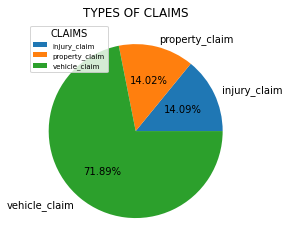

In [30]:
plt.title('TYPES OF CLAIMS')
plt.pie(claim_sum[1:],labels=claims.columns[1:],autopct='%1.2f%%',startangle=0)
plt.legend(title='CLAIMS',loc='upper left',fontsize='x-small')
plt.show()

In [31]:
hour=df_claim['incident_hour_of_the_day'].value_counts()
hour

17    54
3     53
0     52
23    51
16    49
13    46
10    46
4     46
6     44
9     43
14    43
21    42
18    41
12    40
19    40
7     40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64

Text(0.5, 1.0, 'ACCIDENTS OCCURED IN HOURS OF THE DAY')

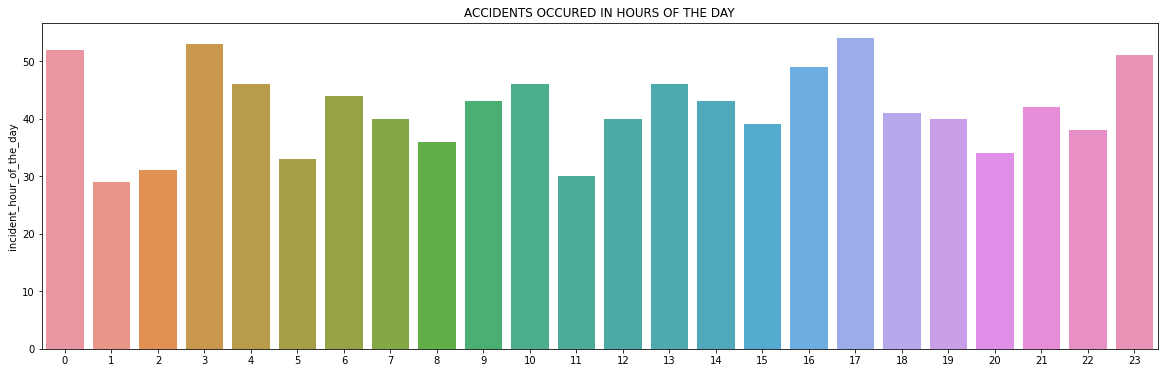

In [32]:
plt.figure(figsize=(20,6))
sns.barplot(x=hour.index,y=hour)
plt.title('ACCIDENTS OCCURED IN HOURS OF THE DAY')


we observe that the accidents occur mostly at early hours in the morning and at the nights

In [33]:
no_of_vechiles=df_claim['number_of_vehicles_involved'].value_counts()
no_of_vechiles

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

Text(0.5, 1.0, 'NUMBER OF VECHILES INVOLVED ')

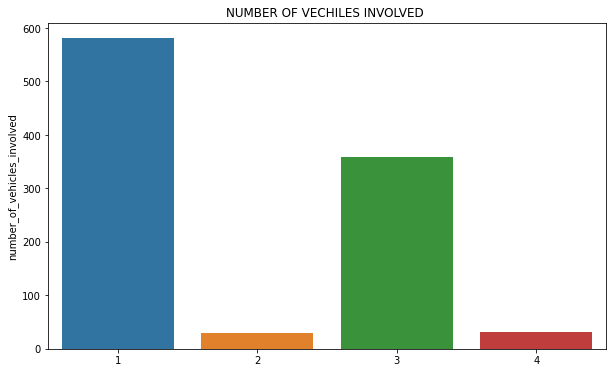

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x=no_of_vechiles.index,y=no_of_vechiles)
plt.title('NUMBER OF VECHILES INVOLVED ')

In [35]:
df_claim['auto_model'].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

In [36]:
car=df_claim.groupby('auto_model')[['total_claim_amount']].mean().sort_values(by='total_claim_amount', ascending=False)
car

,total_claim_amount
auto_model,
X6,66480.625000
Escape,63865.000000
C300,61640.000000
RSX,60902.500000
ML350,59545.500000
Forrestor,59542.500000
Fusion,57632.857143
CRV,56960.500000
RAM,56920.930233


In [37]:
##sns.pairplot(df_claim,hue='total_claim_amount')

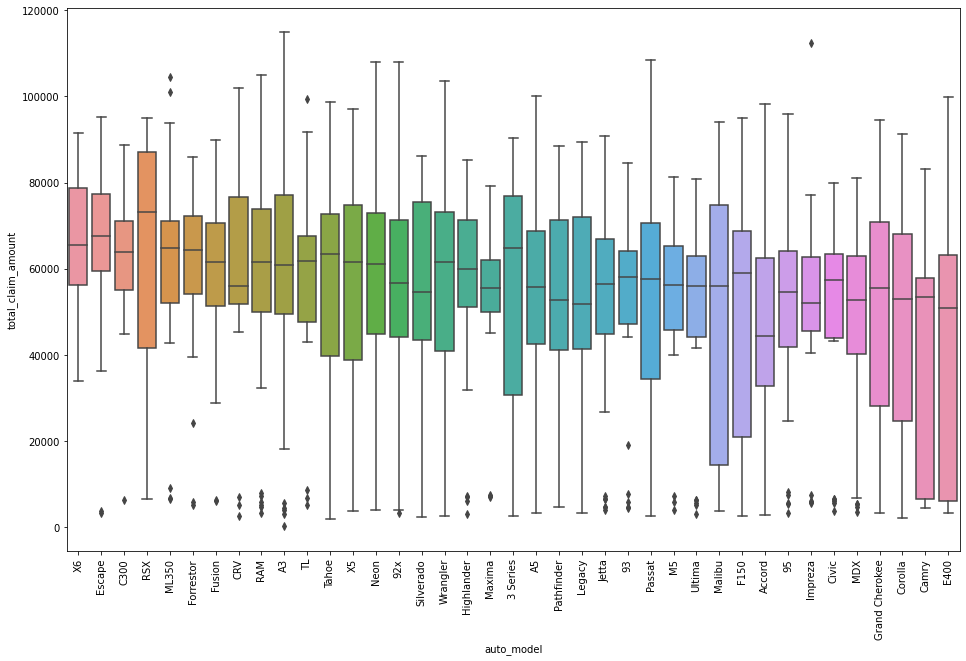

In [38]:
plt.figure(figsize=(16,10))
sns.boxplot(x='auto_model',y='total_claim_amount',data=df_claim,order=car.index)
plt.xticks(rotation = 90)
plt.show()


In [39]:
df_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [40]:
states=df_claim.groupby('incident_state')[['total_claim_amount']].sum().sort_values(by='total_claim_amount',ascending= False)
states

,total_claim_amount
incident_state,
NY,14773770
SC,13538150
WV,10897150
VA,5499770
NC,5421230
PA,1487150
OH,1144720


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


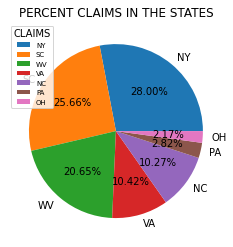

In [41]:
plt.title('PERCENT CLAIMS IN THE STATES')
plt.pie(states,labels=states.index,autopct='%1.2f%%',startangle=0)
plt.legend(title='CLAIMS',loc='upper left',fontsize='x-small')
plt.show()

New York is leading with the most claims at 28% i.e. 14773770

In [42]:
df_claim['incident_year'].value_counts()

2015    1000
Name: incident_year, dtype: int64

In [43]:
df_claim.groupby('incident_month')[['total_claim_amount']].sum()

,total_claim_amount
incident_month,
1,27760970
2,24326250
3,674720


In [44]:
df_claim.groupby(['incident_month','auto_model'])[['total_claim_amount']].sum().sort_values(by='total_claim_amount',ascending=False)

total_claim_amount
incident_month auto_model                    
1              RAM                    1502210
               Wrangler               1240380
               Forrestor              1188550
2              A3                     1124440
1              MDX                    1104330
...                                       ...
3              Maxima                   52290
               Neon                     51600
               X6                       42930
               Tahoe                    38640
               A5                       34160

[90 rows x 1 columns]

In [45]:
df_claim['incident_month']=df_claim['incident_month'].replace({1:'JAN',2:'FEB',3:'MAR'})

In [46]:
df_claim['incident_month'].value_counts()

JAN    516
FEB    472
MAR     12
Name: incident_month, dtype: int64

In [47]:
total_month_claims=df_claim.groupby(['incident_month','auto_model'])[['total_claim_amount']].sum().sort_values(by='total_claim_amount',ascending=False)

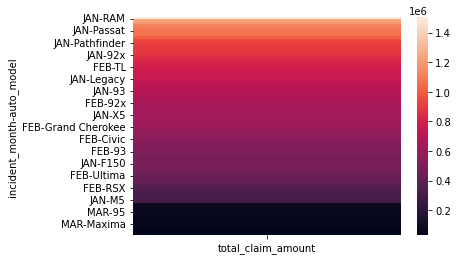

In [48]:
sns.heatmap(total_month_claims,fmt='d')

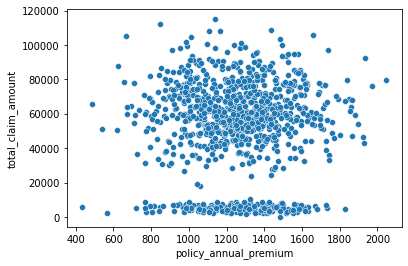

In [49]:
sns.scatterplot(x = 'policy_annual_premium', y = 'total_claim_amount', data = df_claim)

# preparing the data for training

In [50]:
df_claim.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'policy_bind_year',
       'policy_bind_month', 'policy_bind_day', 'policy_bind_week_of_year',
       'incident_year', 'incident_month', 'incident_day',
       'incident_week_of_y

In [51]:
df_claim.shape

(1000, 48)

In [52]:
input_col=['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'policy_bind_year',
       'policy_bind_month', 'policy_bind_day', 'policy_bind_week_of_year',
       'incident_year', 'incident_month', 'incident_day',
       'incident_week_of_year', 'incident_time']


target_col = ['total_claim_amount']

In [53]:
inputs = df_claim[input_col]
targets = df_claim[target_col]

In [54]:
targets

,total_claim_amount
0,71610
1,5070
2,34650
3,63400
4,6500
...,...
995,87200
996,108480
997,67500
998,46980


In [55]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [56]:
targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   total_claim_amount  1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [57]:
inputs.shape, targets.shape

((1000, 44), (1000, 1))

In [58]:
numeric_cols = inputs.select_dtypes(include=np.number).columns.tolist()
len(numeric_cols)

22

In [59]:
categorical_cols = (inputs.select_dtypes(include=['object', 'datetime64[ns]']).columns.tolist())
len(categorical_cols)

22

In [60]:
numeric_cols

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'auto_year',
 'policy_bind_year',
 'policy_bind_month',
 'policy_bind_day',
 'policy_bind_week_of_year',
 'incident_year',
 'incident_day',
 'incident_week_of_year',
 'incident_time']

In [61]:
categorical_cols

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported',
 'incident_month']

In [62]:
len(input_col) == len(numeric_cols) + len(categorical_cols)

True

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(inputs[numeric_cols])
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [64]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = 

In [65]:
inputs.shape

(1000, 2205)

In [66]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 2205 entries, months_as_customer to incident_month_MAR
dtypes: datetime64[ns](2), float64(2183), object(20)
memory usage: 16.8+ MB


In [67]:
inputs.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,fraud_reported_N,fraud_reported_Y,incident_month_FEB,incident_month_JAN,incident_month_MAR
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.425791,0.443289,0.495681,0.424000,0.509878,0.191000,0.372583,0.250011,0.758833,0.506261,...,0.024000,0.023000,0.04200,0.023000,0.016000,0.753000,0.247000,0.472000,0.516000,0.01200
std,0.240320,0.203117,0.286061,0.407910,0.151257,0.208855,0.375680,0.277335,0.252962,0.302234,...,0.153126,0.149978,0.20069,0.149978,0.125538,0.431483,0.431483,0.499465,0.499994,0.10894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.241649,0.288889,0.261705,0.000000,0.406550,0.090909,0.095885,0.000000,0.536454,0.260870,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
50%,0.416493,0.422222,0.481100,0.333333,0.510370,0.090909,0.190411,0.000000,0.790729,0.521739,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000
75%,0.576722,0.555556,0.732554,1.000000,0.608554,0.090909,0.907203,0.507711,1.000000,0.739130,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [68]:
from sklearn.model_selection import train_test_split
train_inputs, test_inputs, train_targets_g, test_targets = train_test_split(
    inputs[numeric_cols + encoded_cols], targets, test_size=0.1, random_state=42)

In [69]:
len(train_inputs), len(test_inputs), len( inputs[numeric_cols + encoded_cols])

(900, 100, 1000)

In [70]:
len(train_targets_g), len(targets),len(test_targets)

(900, 1000, 100)

In [71]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

In [72]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [73]:
%%time
model.fit(train_inputs, train_targets_g)

[06:08:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 1.79 s, sys: 32.2 ms, total: 1.82 s
Wall time: 1.07 s


XGBRegressor(max_depth=4, n_estimators=20, n_jobs=-1, random_state=42)

# predicting

In [74]:
preds = model.predict(train_inputs)
preds

array([57848.633 , 53325.82  , 55381.035 , 52733.465 ,  3756.0994,
       55084.035 , 56074.348 ,  4487.502 ,  5132.8154, 56584.91  ,
       58117.934 , 58709.348 , 55341.965 , 54385.16  , 56674.477 ,
       56929.04  , 55381.035 , 59324.21  , 55811.125 , 55811.125 ,
        3905.2952, 55114.906 , 57848.633 ,  4300.346 , 57461.914 ,
       54404.17  , 56150.312 , 59260.39  , 53760.355 , 55783.363 ,
       56150.312 ,  5197.849 ,  4967.154 , 55662.777 , 55662.777 ,
       56479.586 , 57366.72  , 55811.125 , 56427.324 , 52708.2   ,
       56023.77  , 57500.445 ,  5013.834 ,  4411.4126,  4893.06  ,
       54263.723 , 54791.24  ,  4166.226 , 58946.152 , 55072.98  ,
       54767.87  , 56163.19  , 54404.17  , 57042.984 , 54404.17  ,
       57689.043 , 57461.914 , 56441.676 , 56500.715 , 54779.242 ,
       55072.63  , 54569.9   , 56671.84  , 55811.125 , 55651.6   ,
       55122.645 ,  4529.2466, 56529.6   , 57743.656 , 57461.914 ,
       56673.508 , 58507.402 , 54094.664 , 54608.938 , 54910.5

In [75]:
preds.shape

(900,)

# EVALUATING USING RMSE

In [76]:
def rmse(a,b):
  return mean_squared_error(a, b, squared=False)

In [77]:
rmse(preds,train_targets_g)

15031.784428260744

FEATURE IMPORTANCE

In [78]:
len(train_inputs.columns)

2183

In [79]:
len(model.feature_importances_)

2183

In [80]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [81]:
importance_df.head(10)

,feature,importance
1092,collision_type_?,0.725663
1093,collision_type_Front Collision,0.013060
1109,incident_state_SC,0.010684
898,policy_bind_date_2013-01-23T00:00:00.000000000,0.009528
2167,auto_model_Passat,0.009145
283,policy_bind_date_1996-06-04T00:00:00.000000000,0.009065
2122,police_report_available_?,0.009026
1045,incident_date_2015-01-18T00:00:00.000000000,0.009010
7,capital-gains,0.008194
296,policy_bind_date_1996-08-23T00:00:00.000000000,0.008046


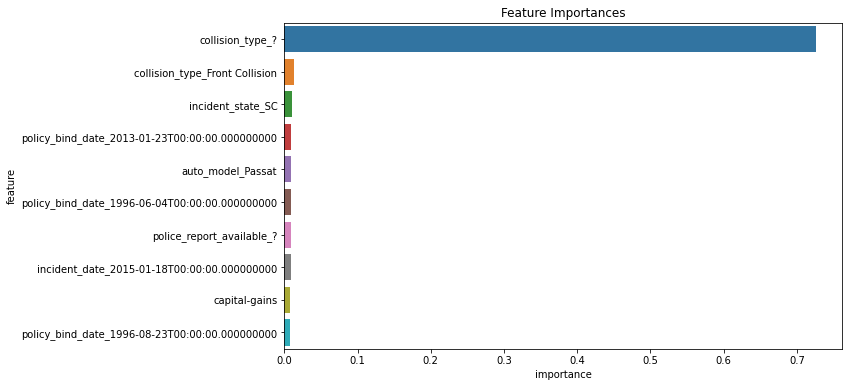

In [82]:
plt.figure(figsize = (10, 6))
plt.title('Feature Importances')
sns.barplot(data = importance_df.head(10), x = 'importance', y = 'feature')

In [83]:
df_claim.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

k-fold cross validation

In [84]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse

In [85]:
kfold = KFold(n_splits=5)

In [86]:
models = []

for train_idxs, val_idxs in kfold.split(train_inputs):
    X_train, train_targets = train_inputs.iloc[train_idxs], train_targets_g.iloc[train_idxs]
    X_val, val_targets = train_inputs.iloc[val_idxs], train_targets_g.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=4, 
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

[06:08:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 14982.677400887733, Validation RMSE: 14528.235394827338
[06:08:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 14606.959191106247, Validation RMSE: 17836.687817024525
[06:08:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 14624.23042490956, Validation RMSE: 16394.863012044363
[06:08:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 14716.242410959327, Validation RMSE: 16136.99021982087
[06:08:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 14852.469716929329, Validation RMSE: 15913.356933184947


In [87]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [88]:
preds = predict_avg(models, train_inputs)
preds

array([56937.688 , 53847.137 , 55941.54  , 53972.125 ,  4090.9487,
       54528.76  , 55070.957 ,  4525.9585,  4981.6064, 56676.742 ,
       58131.086 , 57963.21  , 55285.1   , 54883.055 , 55784.773 ,
       54948.188 , 56104.094 , 58757.7   , 55764.562 , 55391.77  ,
        4094.1821, 55456.086 , 57089.29  ,  4258.325 , 57581.688 ,
       53673.543 , 56578.773 , 58391.53  , 54282.65  , 54294.46  ,
       55937.914 ,  5021.4634,  4933.173 , 55845.305 , 56278.688 ,
       56821.27  , 56650.426 , 56182.76  , 54729.207 , 50224.67  ,
       54259.105 , 54720.867 ,  5018.643 ,  4443.81  ,  5283.526 ,
       55437.395 , 54883.51  ,  4185.6836, 58649.426 , 54899.492 ,
       55452.812 , 55847.164 , 54160.773 , 57538.727 , 54449.086 ,
       57518.043 , 57310.71  , 55898.8   , 56322.51  , 54080.51  ,
       55043.414 , 54896.07  , 56962.68  , 56585.312 , 54820.664 ,
       54489.05  ,  4750.1226, 56068.645 , 57939.18  , 57238.605 ,
       56995.23  , 57996.76  , 54363.04  , 55789.9   , 57234.3

# Hyperparameter Tuning

In [89]:
def test_params_kfold(n_splits, **params):
    train_rmses, val_rmses, models = [], [], []
    kfold = KFold(n_splits)
    for train_idxs, val_idxs in kfold.split(train_inputs):
        X_train, train_targets = train_inputs.iloc[train_idxs], train_targets_g.iloc[train_idxs]
        X_val, val_targets = train_inputs.iloc[val_idxs], train_targets_g.iloc[val_idxs]
        model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, **params)
        models.append(model)
        train_rmses.append(train_rmse)
        val_rmses.append(val_rmse)
    print('Train RMSE: {}, Validation RMSE: {}'.format(np.mean(train_rmses), np.mean(val_rmses)))
    return models

In [90]:
X_train, X_val, train_targets, val_targets = train_test_split(train_inputs, train_targets_g, test_size=0.1)

In [91]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

In [92]:
test_params(n_estimators=10)  

[06:08:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 24575.83108069929, Validation RMSE: 23917.598877388056


In [93]:
test_params(n_estimators=10)

[06:08:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 24575.83108069929, Validation RMSE: 23917.598877388056


In [94]:
test_params(n_estimators=100)

[06:08:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 11570.18099902134, Validation RMSE: 15685.696203042664


In [95]:
test_params(max_depth=2)

[06:08:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 12707.880366744515, Validation RMSE: 15539.03531948741


In [96]:
test_params(max_depth=5)  

[06:08:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 8543.927699456812, Validation RMSE: 16493.002644076787


In [97]:
test_params(n_estimators=50, learning_rate=0.01)

[06:09:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 37811.83881785863, Validation RMSE: 36012.126781395214


In [98]:
test_params(n_estimators=50, learning_rate=0.1)

[06:09:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 12522.781341721693, Validation RMSE: 15440.409923405894


In [99]:
test_params(n_estimators=50, learning_rate=0.3)

[06:09:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 10326.232974681408, Validation RMSE: 16233.228531225577


In [100]:
test_params(booster='gblinear')

[06:09:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 20205.63726651072, Validation RMSE: 21906.23880052939


In [101]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)

In [102]:
%%time
model.fit(train_inputs, train_targets_g)

[06:09:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 2min 9s, sys: 293 ms, total: 2min 9s
Wall time: 1min 7s


XGBRegressor(colsample_bytree=0.7, learning_rate=0.2, max_depth=10,
             n_estimators=1000, n_jobs=-1, random_state=42, subsample=0.9)

In [103]:
test_preds = model.predict(test_inputs)

In [104]:
rmse(test_preds, test_targets)

16410.53846504027

In [105]:
df_claim.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,vehicle_claim,auto_year,policy_bind_year,policy_bind_month,policy_bind_day,policy_bind_week_of_year,incident_year,incident_day,incident_week_of_year,incident_time
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,...,37928.950000,2005.103000,2001.604000,6.559000,15.448000,26.715000,2015.0,14.995000,5.184000,155.689000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,...,18886.252893,6.015861,7.360391,3.499824,8.808001,15.293714,0.0,8.670995,2.468651,88.267522
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,...,70.000000,1995.000000,1990.000000,1.000000,1.000000,1.000000,2015.0,1.000000,1.000000,0.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,...,30292.500000,2000.000000,1995.000000,3.000000,8.000000,13.000000,2015.0,7.750000,3.000000,82.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,...,42100.000000,2005.000000,2002.000000,7.000000,16.000000,27.000000,2015.0,15.000000,5.000000,153.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,...,50822.500000,2010.000000,2008.000000,10.000000,23.000000,40.000000,2015.0,22.000000,7.000000,232.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,...,79560.000000,2015.000000,2015.000000,12.000000,31.000000,53.000000,2015.0,31.000000,9.000000,301.000000


In [106]:
df_claim['total_claim_amount'].describe()

count      1000.00000
mean      52761.94000
std       26401.53319
min         100.00000
25%       41812.50000
50%       58055.00000
75%       70592.50000
max      114920.00000
Name: total_claim_amount, dtype: float64